In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [60]:
a = 100

A = [a]
B = [a]
C = [a]
D = [a]

t = [0]

In [61]:
tend = 20
k1 = 0.3
k2 = 0.01

In [62]:
while t[-1] < tend:
    
    props = [ k1*A[-1]*B[-1], k2*B[-1]*B[-1]*C[-1] ]
    
    prop_sum = sum(props)
    
    if prop_sum == 0:
        break
    
    tau = np.random.exponential(scale=1/prop_sum)
    
    t.append(t[-1] + tau)
    
    rand = random.uniform(0,1)
    
    if rand*prop_sum <= props[0]:
        A.append(A[-1] - 1)
        B.append(B[-1] - 1)
        C.append(C[-1] + 2)
        D.append(D[-1])
        
    elif rand*prop_sum > props[0] and rand*prop_sum <= props[0] + props[1]:
        A.append(A[-1])
        B.append(B[-1] - 2)
        C.append(C[-1] - 1)
        D.append(D[-1] + 1)   

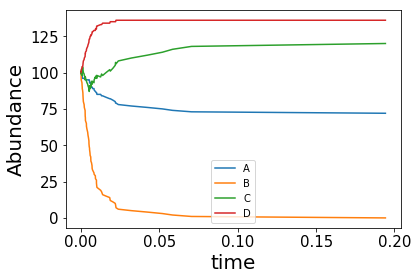

In [63]:
A_plot, = plt.plot(t, A, label="A")
B_plot, = plt.plot(t, B, label="B")
C_plot, = plt.plot(t, C, label="C")
D_plot, = plt.plot(t, D, label="D")

plt.legend(handles=[A_plot, B_plot, C_plot, D_plot])
plt.xlabel('time', fontsize='20')
plt.ylabel('Abundance', fontsize='20')
plt.tick_params(labelsize=15)

In [64]:
# ODE sanity check - Deterministic solution

new_tend = t[-1]

a = 100

y0 = [a, a, a, a] # Initial A,B,C,D values - have to be the same with stoch method

tnew = np.linspace(0, new_tend, num=1000)

params = [k1, k2]

In [65]:
def sim(variables, tnew, params):
    
    Ap = variables[0]
    Bp = variables[1]
    Cp = variables[2]
    Dp = variables[3]
    
    k1 = params[0]
    k2 = params[1]
    
    dAdt = -k1*Ap*Bp
    
    dBdt = -k1*Ap*Bp - 2*k2*(Bp**2)*Cp
    
    dCdt = 2*k1*Ap*Bp - k2*(Bp**2)*Cp
    
    dDdt = k2*(Bp**2)*Cp
    
    return ([dAdt, dBdt, dCdt, dDdt])

y = odeint(sim, y0, tnew, args=(params,))    

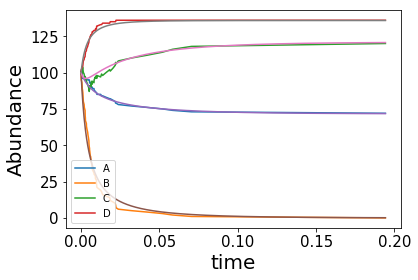

In [66]:
A_plot, = plt.plot(t, A, label="A")
B_plot, = plt.plot(t, B, label="B")
C_plot, = plt.plot(t, C, label="C")
D_plot, = plt.plot(t, D, label="D")

plt.legend(handles=[A_plot, B_plot, C_plot, D_plot])
plt.xlabel('time', fontsize='20')
plt.ylabel('Abundance', fontsize='20')
plt.tick_params(labelsize=15)

plt.plot(tnew,y[:,0])
plt.plot(tnew,y[:,1])
plt.plot(tnew,y[:,2])
plt.plot(tnew,y[:,3])